# Setup

In [20]:
import sys
sys.path.insert(0, '..')

In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

In [31]:
import os

sig = True
zscore = True
cluster = False
# data_dir = os.path.expanduser('~') + 'data'
data_dir = '../data/'

In [32]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [33]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

# Load in phoneme onset data across patients and save to pkl file

In [34]:
import alignment.alignment_utils as utils

In [42]:
pts = ['S14', 'S26', 'S23', 'S33', 'S22', 'S39', 'S58', 'S62']
pt_decoding_data = {}
for pt in pts:
    hg_data = load_subject_high_gamma_phoneme(pt, phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)
    hg_collapsed = np.concatenate((hg_data['X1'], hg_data['X2'], hg_data['X3']), axis=0)
    phon_labels_collapsed = np.concatenate((hg_data['y1'], hg_data['y2'], hg_data['y3']), axis=0)
    artic_labels_collapsed = phon_to_artic_seq(phon_labels_collapsed, phon_to_artic_dict)

    hg_data['X_collapsed'] = hg_collapsed
    hg_data['y_phon_collapsed'] = phon_labels_collapsed
    hg_data['y_artic_collapsed'] = artic_labels_collapsed
    pre_pts = [p for p in pts if p != pt]

    pt_decoding_data[pt] = hg_data | {'pre_pts': pre_pts}

In [37]:
# utils.save_pkl(pt_decoding_data, '../data/pt_decoding_data_S62.pkl')
utils.save_pkl(pt_decoding_data, '../data/pt_decoding_data_S62_zscore.pkl')

In [44]:
pt_decoding_data['S62']['y1']

array([5, 6, 9, 6, 3, 4, 6, 8, 8, 5, 4, 2, 4, 8, 9, 7, 2, 9, 2, 3, 5, 4,
       1, 3, 2, 8, 6, 7, 3, 1, 6, 8, 7, 3, 2, 3, 1, 4, 8, 1, 1, 8, 4, 9,
       7, 5, 2, 7, 4, 8, 8, 7, 9, 4, 4, 2, 5, 5, 3, 2, 4, 1, 9, 8, 8, 1,
       9, 1, 3, 8, 5, 2, 6, 7, 2, 6, 7, 1, 8, 4, 7, 7, 2, 8, 5, 3, 2, 9,
       8, 1, 4, 4, 2, 1, 3, 1, 6, 3, 4, 4, 9, 8, 4, 2, 8, 1, 6, 7, 2, 4,
       7, 6, 9, 5, 7, 1, 5, 4, 3, 3, 6, 1, 7, 9, 8, 6, 8, 3, 8, 4, 2, 6,
       4, 4, 4, 9, 2, 7, 8, 3, 7, 1, 1, 2, 1, 3, 1, 4, 3, 8, 6, 7, 3, 8,
       4, 9, 9, 3, 6, 8, 5, 9, 6, 5, 3, 5, 2, 8, 8, 8, 4, 5, 2, 1, 7, 2,
       1, 4], dtype=uint8)

# Check data in pkl file

In [11]:
hg_data.keys()

dict_keys(['ID', 'X1', 'X1_map', 'y1', 'X2', 'X2_map', 'y2', 'X3', 'X3_map', 'y3', 'y_full_phon', 'X_collapsed', 'y_phon_collapsed', 'y_artic_collapsed'])

S14: 
[(144, 200, 111), (144,), (144, 3)]
[(148, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74), (137, 200, 144), (141, 200, 171), (178, 200, 201)]


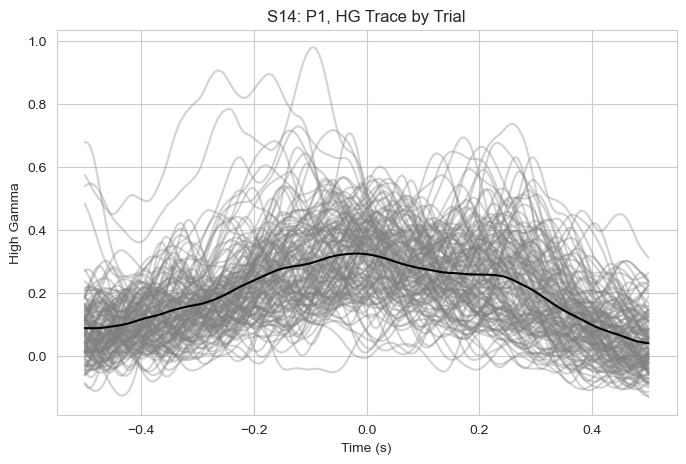

S26: 
[(148, 200, 111), (148,), (148, 3)]
[(144, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74), (137, 200, 144), (141, 200, 171), (178, 200, 201)]


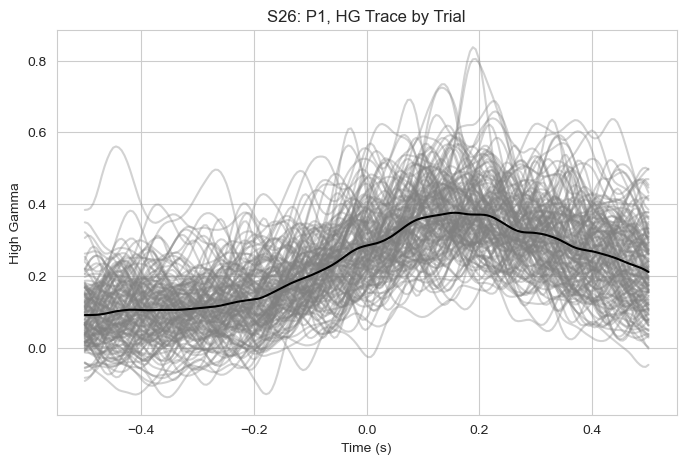

S23: 
[(151, 200, 63), (151,), (151, 3)]
[(144, 200, 111), (148, 200, 111), (46, 200, 149), (151, 200, 74), (137, 200, 144), (141, 200, 171), (178, 200, 201)]


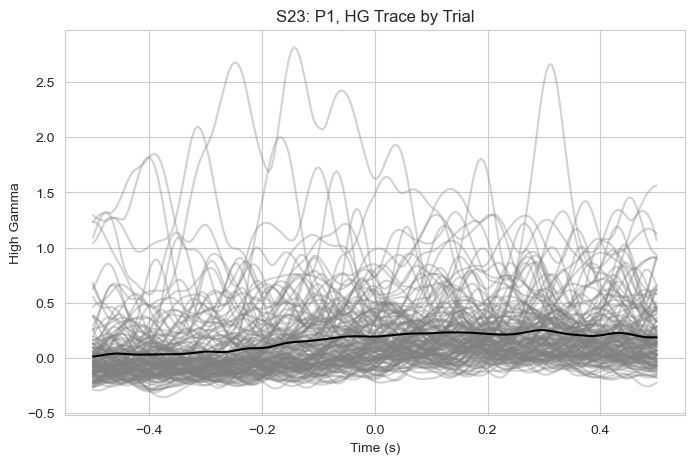

S33: 
[(46, 200, 149), (46,), (46, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (151, 200, 74), (137, 200, 144), (141, 200, 171), (178, 200, 201)]


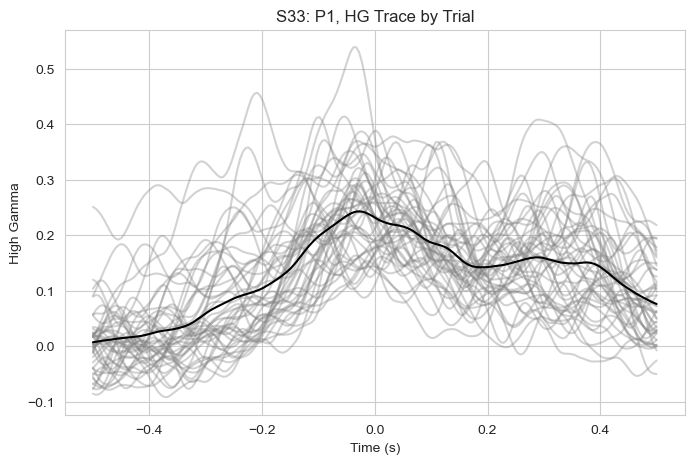

S22: 
[(151, 200, 74), (151,), (151, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (46, 200, 149), (137, 200, 144), (141, 200, 171), (178, 200, 201)]


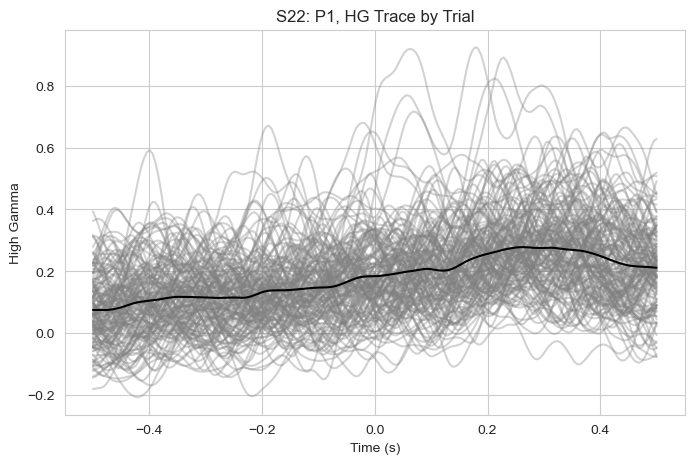

S39: 
[(137, 200, 144), (137,), (137, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74), (141, 200, 171), (178, 200, 201)]


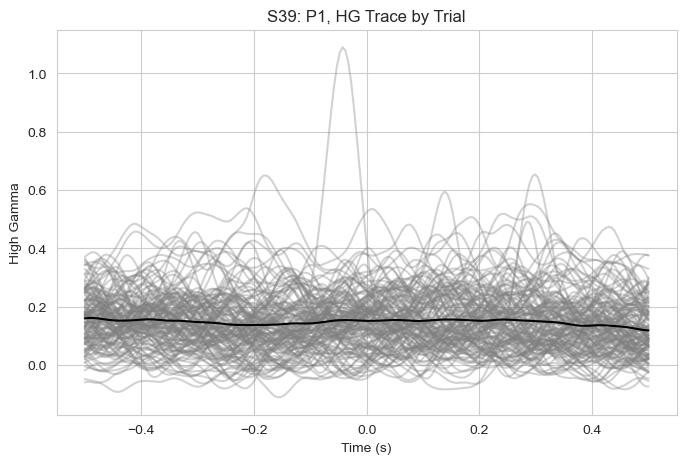

S58: 
[(141, 200, 171), (141,), (141, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74), (137, 200, 144), (178, 200, 201)]


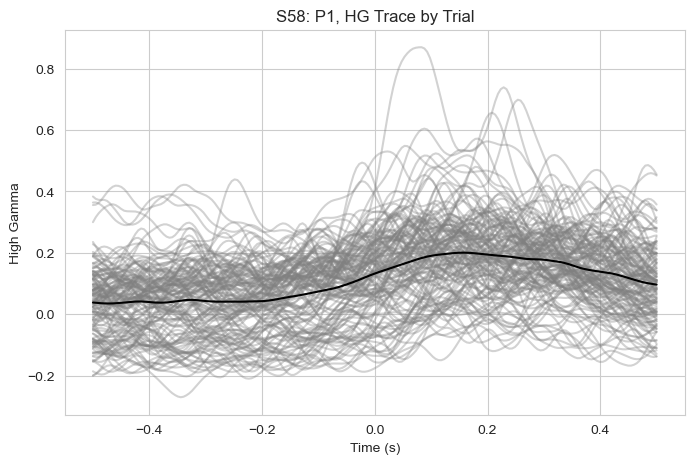

S62: 
[(178, 200, 201), (178,), (178, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74), (137, 200, 144), (141, 200, 171)]


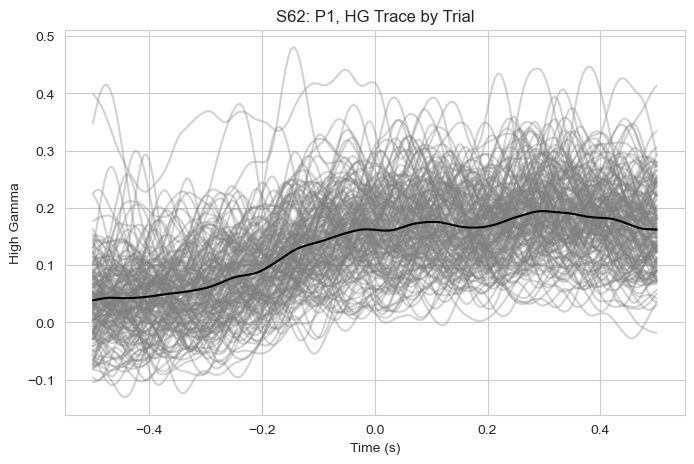

In [30]:
p_ind = 1
t = np.linspace(-0.5, 0.5, 200)

for pt in pts:
    print(f'{pt}: ')
    pt_data, pre_data = utils.decoding_data_from_dict(pt_decoding_data, pt, p_ind, lab_type='phon', algn_type='phon_seq')
    print([d.shape for d in pt_data])
    print([p[0].shape for p in pre_data])

    hg_data = pt_data[0]
    plt.figure(figsize=(8,5))
    plt.plot(t, np.mean(hg_data, axis=2).T, 'grey', alpha=0.35)
    plt.plot(t, np.mean(np.mean(hg_data, axis=2), axis=0), 'black')
    plt.title(f'{pt}: P{p_ind}, HG Trace by Trial')
    plt.xlabel('Time (s)')
    plt.ylabel('High Gamma')
    plt.show()
    
    # hg_data = pt_data[0]
    # plt.figure(figsize=(8,5))
    # plt.plot(t, np.mean(hg_data, axis=0), 'grey', alpha=0.35)
    # plt.plot(t, np.mean(np.mean(hg_data, axis=0), axis=1), 'black')
    # plt.title(f'{pt}: P{p_ind}, HG Trace by Channel')
    # plt.xlabel('Time (s)')
    # plt.ylabel('High Gamma')
    # plt.show()